## Import necessary libraries

In [2]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read filtered mimicel event log

In [3]:
# please ensure you have filered_mimicel.csv in the same directory as this script
# dataset is not provided in this repository, please run the provided SQL script to generate the dataset
log = pd.read_csv('./filtered_mimicel.csv')

log.head()

,stay_id,subject_id,hadm_id,timestamps,activity,gender,race,arrival_transport,disposition,seq_num,...,rhythm,name,gsn,ndc,etc_rn,etccode,etcdescription,med_rn,gsn_rn,los
0,30000012,11714491,21562392.0,2126-02-14 20:22:00,Enter the ED,F,WHITE,AMBULANCE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30000012,11714491,21562392.0,2126-02-14 20:22:01,Triage in the ED,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30000012,11714491,21562392.0,2126-02-14 22:21:00,Medicine reconciliation,NaN,NaN,NaN,NaN,NaN,...,NaN,spironolactone,6818.0,1.672902e+10,2.0,6043.0,Aldosterone Receptor Antagonists,NaN,NaN,NaN
3,30000012,11714491,21562392.0,2126-02-14 22:21:00,Medicine reconciliation,NaN,NaN,NaN,NaN,NaN,...,NaN,spironolactone,6818.0,1.672902e+10,1.0,5658.0,"Diuretic - Aldosterone Receptor Antagonist, No...",NaN,NaN,NaN
4,30000012,11714491,21562392.0,2126-02-14 22:21:00,Medicine reconciliation,NaN,NaN,NaN,NaN,NaN,...,NaN,rifaximin,66295.0,5.486862e+10,1.0,5844.0,Rifamycins and Related Derivative Antibiotics,NaN,NaN,NaN


In [4]:
print(f"The shape of the dataset is: {log.shape}")

The shape of the dataset is: (7488243, 32)


In [6]:
# please ensure you have c;eaned_mimicel_static_attributes.csv in the same directory as this script
# dataset is not provided in this repository, please run the provided SQL script to generate the dataset
log_static = pd.read_csv('./cleaned_mimicel_static_attributes.csv')
print(f"The shape of the dataset is: {log_static.shape}")

The shape of the dataset is: (425028, 7)


In [7]:
log_static.head()

,stay_id,gender,race,arrival_transport,disposition,los,acuity
0,30000055,F,OTHER,WALK IN,HOME,249.0,3.0
1,30000492,F,WHITE,WALK IN,ADMITTED,239.0,3.0
2,30000679,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,564.0,2.0
3,30000685,M,WHITE,WALK IN,HOME,336.0,3.0
4,30000936,M,WHITE,UNKNOWN,LEFT WITHOUT BEING SEEN,60.0,4.0


#### acuity cohorts evaluation

##### acuity = 1

In [8]:
a1_ids = log_static.loc[log_static['acuity'] == 1]['stay_id'].tolist()
print(f"Number of stay_ids with acuity 1: {len(a1_ids)}")

Number of stay_ids with acuity 1: 24013


In [9]:
a1_log = log.loc[log['stay_id'].isin(a1_ids)]
print(f"Shape of the dataset with acuity 1: {a1_log.shape}")

Shape of the dataset with acuity 1: (525592, 32)


##### acuity = 2

In [10]:
a2_ids = log_static.loc[log_static['acuity'] == 2]['stay_id'].tolist()
print(f"Number of stay_ids with acuity 2: {len(a2_ids)}")

Number of stay_ids with acuity 2: 139403


In [11]:
a2_log = log.loc[log['stay_id'].isin(a2_ids)]
print(f"Shape of the dataset with acuity 2: {a2_log.shape}")

Shape of the dataset with acuity 2: (2884474, 32)


##### acuity = 3

In [12]:
a3_ids = log_static.loc[log_static['acuity'] == 3]['stay_id'].tolist()
print(f"Number of stay_ids with acuity 3: {len(a3_ids)}")

Number of stay_ids with acuity 3: 225045


In [13]:
a3_log = log.loc[log['stay_id'].isin(a3_ids)]
print(f"Shape of the dataset with acuity 3: {a3_log.shape}")

Shape of the dataset with acuity 3: (3685834, 32)


##### acuity = 4

In [14]:
a4_ids = log_static.loc[log_static['acuity'] == 4]['stay_id'].tolist()
print(f"Number of stay_ids with acuity 4: {len(a4_ids)}")

Number of stay_ids with acuity 4: 28496


In [15]:
a4_log = log.loc[log['stay_id'].isin(a4_ids)]
print(f"Shape of the dataset with acuity 4: {a4_log.shape}")

Shape of the dataset with acuity 4: (284767, 32)


##### acuity = 5

In [16]:
a5_ids = log_static.loc[log_static['acuity'] == 5]['stay_id'].tolist()
print(f"Number of stay_ids with acuity 5: {len(a5_ids)}")

Number of stay_ids with acuity 5: 1095


In [17]:
a5_log = log.loc[log['stay_id'].isin(a5_ids)]
print(f"Shape of the dataset with acuity 5: {a5_log.shape}")

Shape of the dataset with acuity 5: (8747, 32)


#### LoS distribution

In [18]:
# export the datasets
log_static.to_csv('./log_static.csv', index= False)

In [19]:
log_static['los'].describe()

count    425028.000000
mean        431.826132
std         449.737130
min           1.000000
25%         212.000000
50%         328.000000
75%         500.000000
max      118154.000000
Name: los, dtype: float64

(0.0, 2000.0)

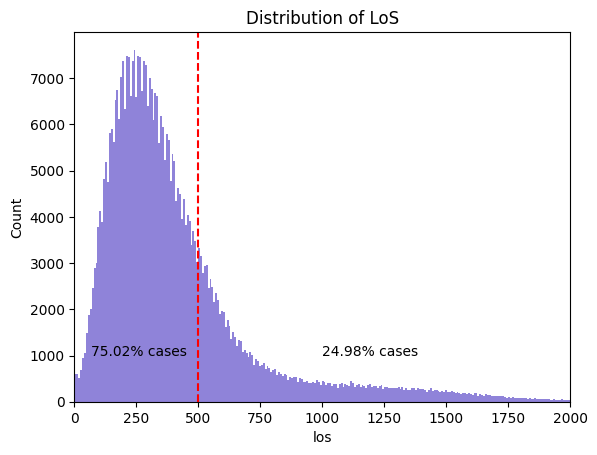

In [20]:
hist = sns.histplot(data=log_static, x = 'los', color = 'slateblue')
plt.axvline(x=500, color='r', linestyle='--')

long_los = log_static[log_static['los'] > 500]
short_los = log_static[log_static['los'] <= 500]
percent_long = round(100 * len(long_los) / len(log_static), 2)
percent_short = round(100 * len(short_los) / len(log_static), 2)

plt.text(1000, 1000, f"{percent_long}% cases", rotation=0)
plt.text(65, 1000, f"{percent_short}% cases", rotation=0)
plt.title("Distribution of LoS")

plt.xlim(0, 2000)

In [23]:
counts = [p.get_height() for p in hist.patches]
log_static['los'].value_counts()


241.000000     893
260.000000     893
226.000000     887
284.000000     887
277.000000     886
              ... 
345.116667       1
584.500000       1
319.983333       1
413.016667       1
1236.833333      1
Name: los, Length: 29831, dtype: int64

In [30]:
# export the LoS and Frequency in a csv for Visualisation in external tools
# from 0 to 2000, step is 20

# Assuming 'log_static' is your DataFrame and it contains the 'los' column.
los_freq_list = []  # Use a list to collect rows before creating the DataFrame.

# Set the range and compute frequencies.
for i in range(0, 2001, 20):
    if i == 0:
        freq = 0  # Initial frequency for the first interval.
    else:
        freq = len(log_static[(log_static['los'] > i - 20) & (log_static['los'] <= i)])
    los_freq_list.append({'LoS': i, 'Frequency': freq})

# Convert the list of dictionaries to a DataFrame.
los_freq = pd.DataFrame(los_freq_list)

# Save the results to a CSV file.
los_freq.to_csv('./los_freq.csv', index=False)  # This file will be used for visualisation in flourish.studio



#### Acuity & LoS

In [31]:
df = log_static.groupby(['los','acuity'])['stay_id'].nunique().reset_index()
df.head()

,los,acuity,stay_id
0,1.0,1.0,2
1,1.0,2.0,2
2,1.0,4.0,1
3,2.0,1.0,5
4,2.0,2.0,2


Visualise with dot plot, x axis is LoS, y axis is acuity, color is number of patients

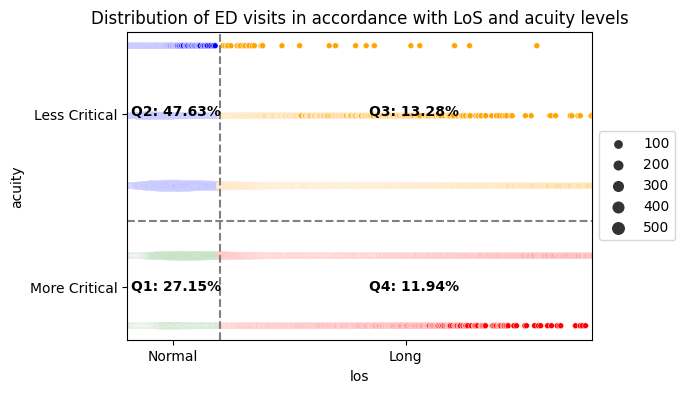

In [33]:
plt.figure(figsize=(6,4))
x = df['los']
y = df['acuity']


plt.xlim(0,2500)
plt.axhline(y= 2.5, color='gray', linestyle='--')
plt.axvline(x=500, color='gray', linestyle='--')
counters = [0, 0, 0, 0]


urgent_normal= df.loc[(df['los'] <= 500) & (df['acuity'] <= 2 )]
urgent_slow = df.loc[(df['los'] > 500) & (df['acuity'] <= 2 )]
non_normal = df.loc[(df['los'] <= 500) & (df['acuity'] > 2)]
non_slow = df.loc[(df['los'] > 500) & (df['acuity'] > 2)]

def get_color(x, y):
    if x <= 500 and (y <= 2):
        counters[0] = urgent_normal['stay_id'].sum()
        return 'green'
    elif x > 500 and (y <= 2):
        counters[1] = urgent_slow['stay_id'].sum()
        return 'red'
    elif x <= 500 and (y > 2):
        counters[2] = non_normal['stay_id'].sum()
        return 'blue'
    else:
        counters[3] = non_slow['stay_id'].sum()
        return 'orange'

# Plot the data with different colors for each area
colors = [get_color(xi, yi) for xi, yi in zip(x, y)]

sns.scatterplot(x=x, y=y, size = df['stay_id'], c=colors, marker='o')

Q1_ratio = counters[0]/(counters[0]+counters[1]+counters[2]+counters[3])
Q4_ratio = counters[1]/(counters[0]+counters[1]+counters[2]+counters[3])
Q2_ratio = counters[2]/(counters[0]+counters[1]+counters[2]+counters[3])
Q3_ratio = counters[3]/(counters[0]+counters[1]+counters[2]+counters[3])


plt.text(20, 1.5, 'Q1: '+str(f"{Q1_ratio:.2%}"), weight="bold")
plt.text(1300, 1.5, 'Q4: '+str(f"{Q4_ratio:.2%}"),weight="bold")
plt.text(20, 4, 'Q2: '+str(f"{Q2_ratio:.2%}"),weight="bold")
plt.text(1300, 4, 'Q3: '+str(f"{Q3_ratio:.2%}"),weight="bold")


plt.yticks([1.55,4.02],['More Critical', 'Less Critical'])
plt.xticks([248,1498],['Normal','Long'])
plt.title("Distribution of ED visits in accordance with LoS and acuity levels")
# Move the legend to the side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend()

plt.show()

In [ ]:
# sample the dataset for visualisation, the plot above is too crowded
# the sample size is 5000

df_sample = df.sample(5000, random_state=42)
df_sample.to_csv('./df_sample.csv', index= False)

##### Q1 map

In [34]:
q1_ids = log_static.loc[(log_static['los'] <= 500) & (log_static['acuity'] <= 2 )]['stay_id'].tolist()
len(q1_ids)

113495

In [35]:
q1_log= log.loc[log['stay_id'].isin(q1_ids)]
len(q1_log)

2095633

In [36]:
q1_log.to_csv('./q1_acuity_los.csv', index= False)

##### Q4 map

In [37]:
q4_ids = log_static.loc[(log_static['los'] > 500) & (log_static['acuity'] <= 2 )]['stay_id'].tolist()
len(q4_ids)

49921

In [38]:
q4_log= log.loc[log['stay_id'].isin(q4_ids)]
len(q4_log)

1314433

In [39]:
q4_log.to_csv('./q4_acuity_los.csv', index= False)

In [40]:
q4_cohort = log_static[(log_static['acuity']<= 2) & (log_static['los'] > 500)]
q4_cohort.head()

,stay_id,gender,race,arrival_transport,disposition,los,acuity
2,30000679,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,564.0,2.0
10,30003389,M,WHITE,WALK IN,ADMITTED,1232.0,2.0
14,30005498,F,BLACK/AFRICAN AMERICAN,AMBULANCE,HOME,654.0,2.0
34,30014806,M,BLACK/AFRICAN AMERICAN,AMBULANCE,HOME,837.0,2.0
40,30016848,F,BLACK/AFRICAN AMERICAN,WALK IN,LEFT AGAINST MEDICAL ADVICE,526.0,2.0


In [41]:
q4_cohort.groupby('disposition')['stay_id'].count()

disposition
ADMITTED                       22827
ELOPED                           360
EXPIRED                           46
HOME                           22694
LEFT AGAINST MEDICAL ADVICE      213
LEFT WITHOUT BEING SEEN           25
OTHER                            369
TRANSFER                        3387
Name: stay_id, dtype: int64

##### Q4_home

In [42]:
q4_home_ids = log_static.loc[(log_static['los'] > 500) & (log_static['acuity'] <= 2 ) & (log_static['disposition'] == 'HOME')]['stay_id'].tolist()
len(q4_home_ids)

22694

In [43]:
q4_home_log= log.loc[log['stay_id'].isin(q4_home_ids)]
len(q4_home_log)

559481

In [44]:
q4_home_log.to_csv('./q4_home.csv', index= False)

##### Q4_admitted

In [45]:
q4_adm_ids = log_static.loc[(log_static['los'] > 500) & (log_static['acuity'] <= 2 ) & (log_static['disposition'] == 'ADMITTED')]['stay_id'].tolist()
len(q4_adm_ids)

22827

In [46]:
q4_adm_log= log.loc[log['stay_id'].isin(q4_adm_ids)]
len(q4_adm_log)

647210

In [47]:
q4_adm_log.to_csv('./q4_adm.csv', index= False)